## 1. Setup

In [1]:
import sys
sys.path.append('../..')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

from experiments.experiment_utils import *

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. CARPK

In [4]:
dataset_name = 'carpk'
experiment_name = 'sigma_10_loss_logcosh_full_img_epochs_13_lr_1e-4'
exp_path = f'./{dataset_name}/{experiment_name}/results/quantitative'

res_list = []
for res_path in sorted(os.listdir(exp_path)):
    csv_path = f'{exp_path}/{res_path}/results.csv'
    print(csv_path)
    res_df = pd.read_csv(csv_path, index_col=[3])
    res_list.append(res_df)

./carpk/sigma_10_loss_logcosh_full_img_epochs_13_lr_1e-4/results/quantitative/epoch_01/results.csv
./carpk/sigma_10_loss_logcosh_full_img_epochs_13_lr_1e-4/results/quantitative/epoch_02/results.csv
./carpk/sigma_10_loss_logcosh_full_img_epochs_13_lr_1e-4/results/quantitative/epoch_03/results.csv
./carpk/sigma_10_loss_logcosh_full_img_epochs_13_lr_1e-4/results/quantitative/epoch_04/results.csv
./carpk/sigma_10_loss_logcosh_full_img_epochs_13_lr_1e-4/results/quantitative/epoch_05/results.csv
./carpk/sigma_10_loss_logcosh_full_img_epochs_13_lr_1e-4/results/quantitative/epoch_06/results.csv
./carpk/sigma_10_loss_logcosh_full_img_epochs_13_lr_1e-4/results/quantitative/epoch_07/results.csv
./carpk/sigma_10_loss_logcosh_full_img_epochs_13_lr_1e-4/results/quantitative/epoch_08/results.csv
./carpk/sigma_10_loss_logcosh_full_img_epochs_13_lr_1e-4/results/quantitative/epoch_09/results.csv
./carpk/sigma_10_loss_logcosh_full_img_epochs_13_lr_1e-4/results/quantitative/epoch_10/results.csv
./carpk/si

In [5]:
def get_results(res_list, metric='MAE', split='train'):
    r = []
    for res_df in res_list:
        value = res_df[metric][split]
        if metric in ['Underestimate', 'Overestimate', 'Difference']:
            value = float(value.split('%')[0])
        r.append(value)
    
    return r

print(get_results(res_list, metric='MAE', split='train'))
print(get_results(res_list, metric='MAE', split='val'))
print(get_results(res_list, metric='MAE', split='test'))
print(get_results(res_list, metric='Difference', split='test'))

[9.083, 3.886, 3.832, 2.7510000000000003, 2.5869999999999997, 2.6689999999999996, 2.22, 2.292, 2.293, 1.8630000000000002, 4.813, 2.6319999999999997, 1.7819999999999998]
[8.662, 4.246, 3.4730000000000003, 3.0810000000000004, 2.355, 2.7889999999999997, 2.6039999999999996, 2.98, 2.499, 2.339, 4.209, 2.437, 2.349]
[9.196, 10.874, 18.021, 17.797, 13.414000000000001, 14.561, 16.714000000000002, 21.471, 24.575, 15.534, 11.137, 13.567, 17.155]
[8.887, 10.508, 17.414, 17.198, 12.962, 14.071, 16.151, 20.749, 23.748, 15.011, 10.762, 13.11, 16.577]


In [6]:
def plot_results(res_list, metric='', new_figure=True):
    train_res = get_results(res_list, metric=metric, split='train')
    val_res = get_results(res_list, metric=metric, split='val')
    test_res = get_results(res_list, metric=metric, split='test')
    
    if new_figure:
        plt.figure()
    
    plt.title(metric)
    epochs = 1 + np.arange(len(train_res))
    plt.plot(epochs, train_res, label='train')
    plt.plot(epochs, val_res, label='val')
    plt.plot(epochs, test_res, label='test')
    plt.legend()

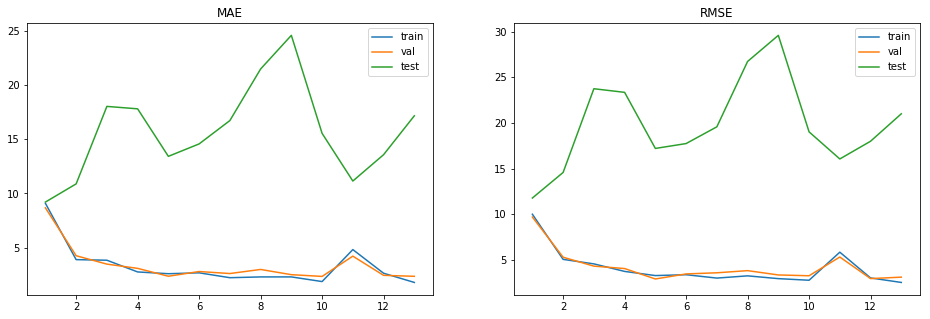

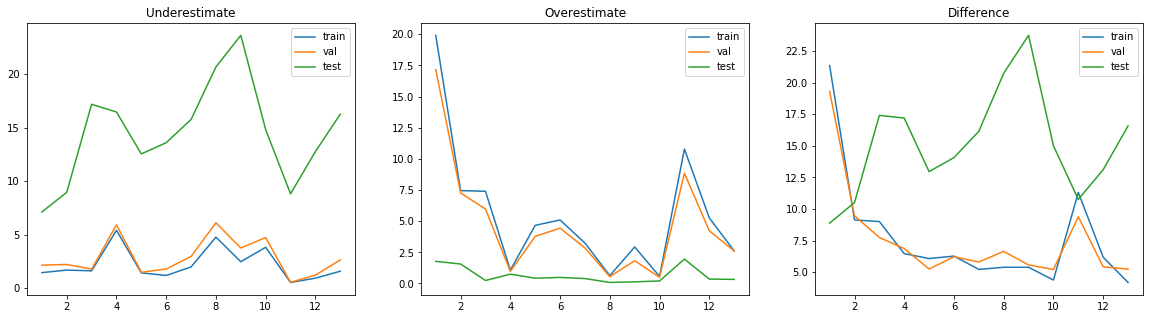

In [7]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plot_results(res_list, metric='MAE', new_figure=False)
plt.subplot(1, 2, 2)
plot_results(res_list, metric='RMSE', new_figure=False)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_results(res_list, metric='Underestimate', new_figure=False)
plt.subplot(1, 3, 2)
plot_results(res_list, metric='Overestimate', new_figure=False)
plt.subplot(1, 3, 3)
plot_results(res_list, metric='Difference', new_figure=False)